In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
diabetes_dataset.shape

(768, 9)

In [4]:
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
diabetes_dataset.duplicated().sum()

np.int64(0)

In [7]:
diabetes_dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

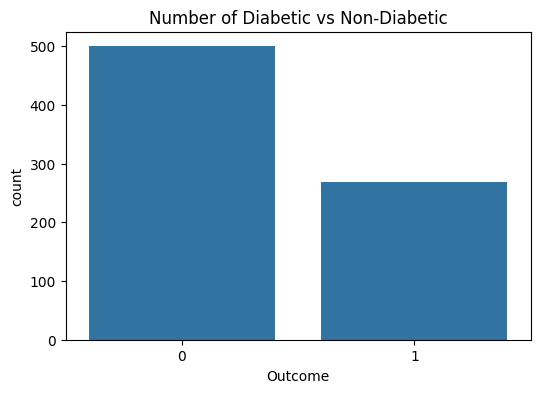

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(6,4))
sns.countplot(x='Outcome', data=diabetes_dataset)
plt.title("Number of Diabetic vs Non-Diabetic")
plt.show()

In [8]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


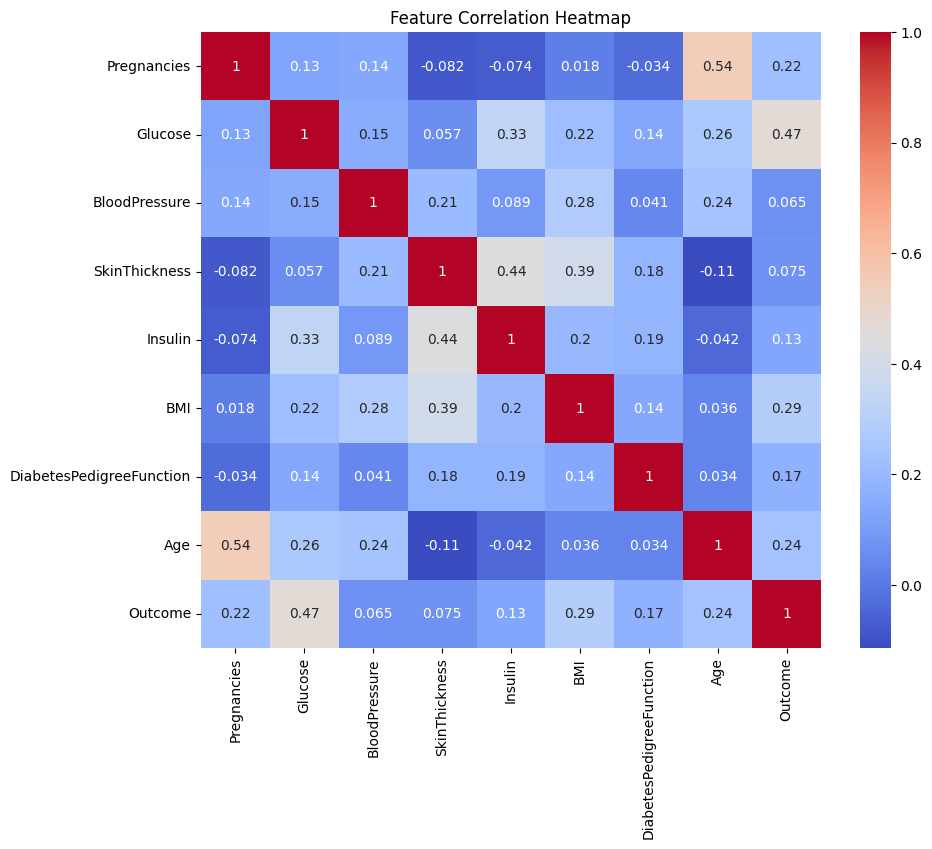

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(diabetes_dataset.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

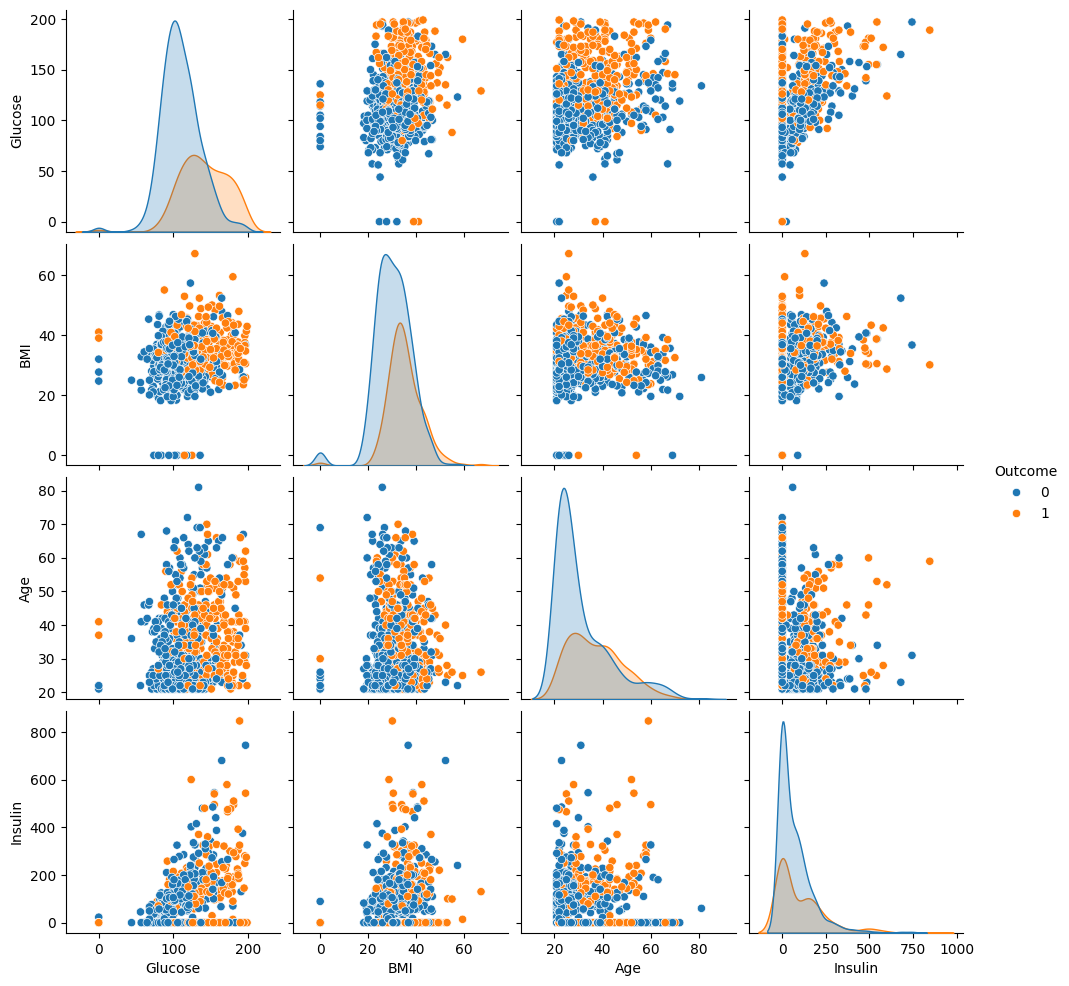

In [24]:
sns.pairplot(diabetes_dataset[['Glucose','BMI','Age','Insulin','Outcome']], hue='Outcome')
plt.show()

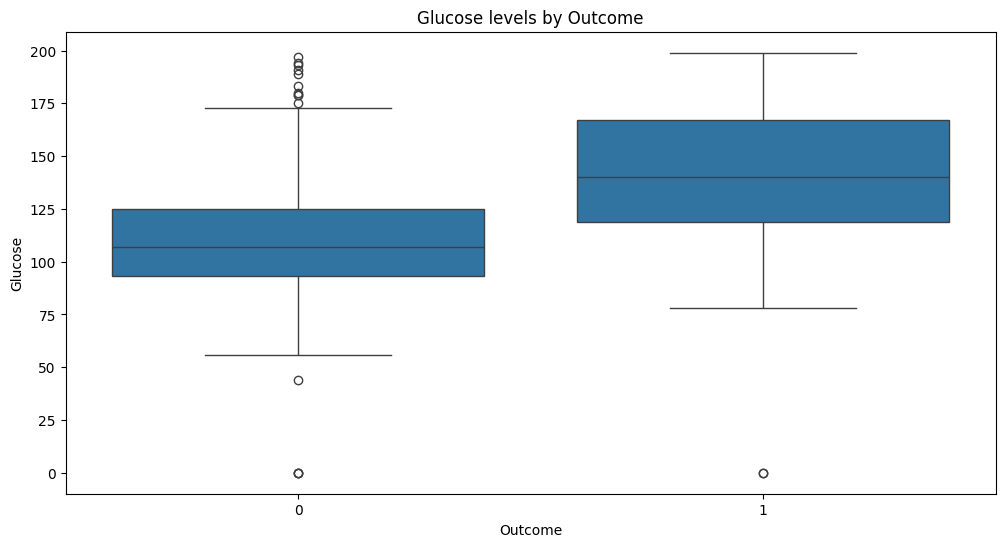

In [25]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_dataset)
plt.title("Glucose levels by Outcome")
plt.show()

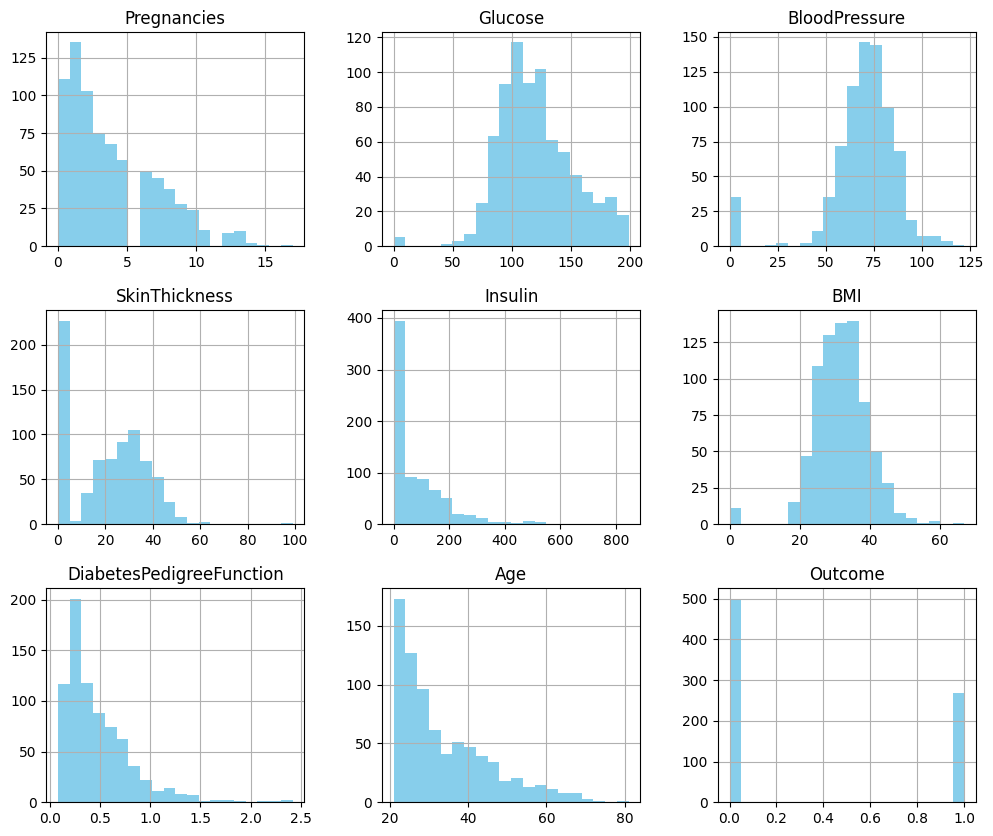

In [26]:
diabetes_dataset.hist(bins=20, figsize=(12,10), color='skyblue')
plt.show()

In [9]:
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [10]:
scaler = StandardScaler()

In [11]:
scaler.fit(X)

,copy,True
,with_mean,True
,with_std,True


In [12]:
standardized_data = scaler.transform(X)

In [13]:
X = standardized_data
Y = diabetes_dataset['Outcome']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, stratify=Y, random_state=2)

In [15]:
classifier = svm.SVC(kernel='linear')

In [16]:
classifier.fit(X_train, Y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [17]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [19]:
training_data_accuracy

0.7866449511400652

In [20]:
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_data_accuracy

0.7727272727272727

In [21]:
input_data = (5,166,72,19,175,25.8,0.587,51)


input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)


std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [27]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (Linear)": SVC(kernel='linear'),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
}

for name, model in models.items():
    scores = cross_val_score(model, X, Y, cv=5)  
    print(f"{name} Accuracy: {scores.mean():.4f} (+/- {scores.std():.4f})")


Logistic Regression Accuracy: 0.7709 (+/- 0.0247)
SVM (Linear) Accuracy: 0.7735 (+/- 0.0219)
K-Nearest Neighbors Accuracy: 0.7331 (+/- 0.0201)
Random Forest Accuracy: 0.7696 (+/- 0.0347)


In [28]:
best_model = RandomForestClassifier(n_estimators=100)
best_model.fit(X_train, Y_train)


train_pred = best_model.predict(X_train)
test_pred = best_model.predict(X_test)

print("Train Accuracy:", accuracy_score(Y_train, train_pred))
print("Test Accuracy:", accuracy_score(Y_test, test_pred))


Train Accuracy: 1.0
Test Accuracy: 0.7207792207792207


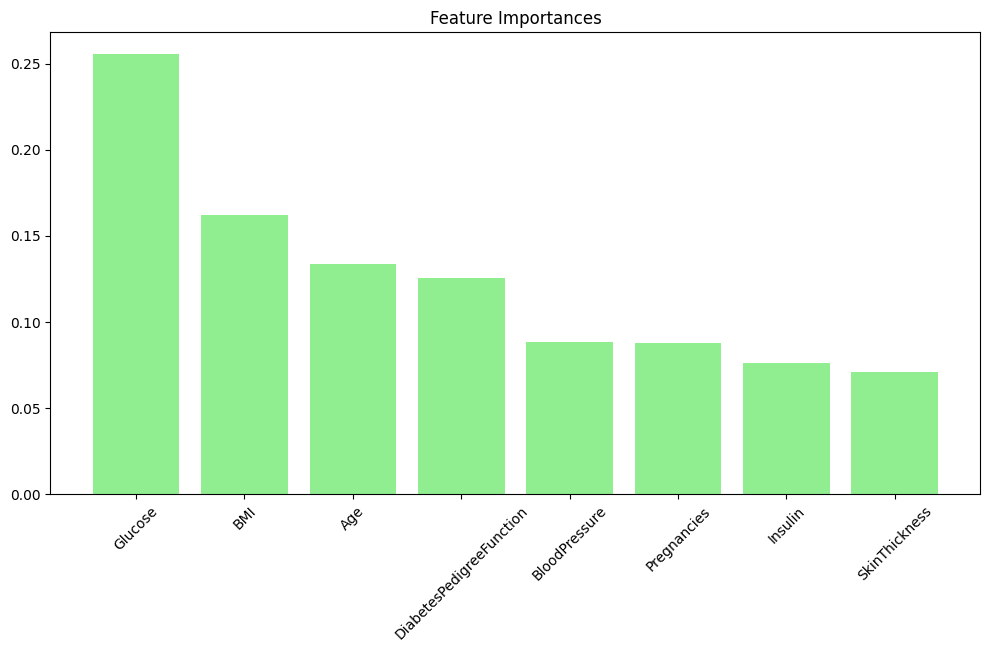

In [29]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices], color='lightgreen')
plt.xticks(range(X.shape[1]), diabetes_dataset.drop('Outcome', axis=1).columns[indices], rotation=45)
plt.show()